In [1]:
import numpy as np
import pandas as pd

In [2]:
# unsupervised machine learning model for tedx talks

df = pd.read_csv('tedx_datase.csv')

In [3]:
# data exploration

df.head()

,idx,main_speaker,title,details,posted,url,num_views
0,8d2005ec35280deb6a438dc87b225f89,Alexandra Auer,The intangible effects of walls,More barriers exist now than at the end of Wor...,Posted Apr 2020,https://www.ted.com/talks/alexandra_auer_the_i...,NaN
1,b3072cd11f40eb57fd259555264476c6,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...,If you're feeling anxious or fearful during th...,Posted Apr 2020,https://www.ted.com/talks/elizabeth_gilbert_it...,NaN
2,4adc9fee977fa04c357ed4c9b52aa3cc,Butterscotch,"""Accept Who I Am""","Firing off her formidable beatboxing skills, m...",Posted Apr 2020,https://www.ted.com/talks/butterscotch_accept_...,0.0
3,59c641a72b495d522a7932145d6c02b3,Ethan Lisi,What it's really like to have autism,"""Autism is not a disease; it's just another wa...",Posted Apr 2020,https://www.ted.com/talks/ethan_lisi_what_it_s...,NaN
4,d227f2faf6ec185e54436d86463f499b,Daniel Finkel,Can you solve the sea monster riddle?,"According to legend, once every thousand years...",Posted Apr 2020,https://www.ted.com/talks/daniel_finkel_can_yo...,0.0


In [4]:
df.columns

Index(['idx', 'main_speaker', 'title', 'details', 'posted', 'url',
       'num_views'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idx           4467 non-null   object 
 1   main_speaker  4466 non-null   object 
 2   title         4467 non-null   object 
 3   details       4467 non-null   object 
 4   posted        4467 non-null   object 
 5   url           4467 non-null   object 
 6   num_views     209 non-null    float64
dtypes: float64(1), object(6)
memory usage: 244.4+ KB


In [6]:
df.describe()

,num_views
count,209.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [7]:
# importing the necessary libraries

import matplotlib.pyplot as plt
import nltk
import string
import warnings
from scipy.stats import pearsonr
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download("stopwords")
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df.isnull().sum()

idx                0
main_speaker       1
title              0
details            0
posted             0
url                0
num_views       4258
dtype: int64

In [9]:
splitted = df['posted'].str.split(' ', expand=True)

# create new columns
df['year'] = splitted[2].astype('int')
df['month'] = splitted[1]

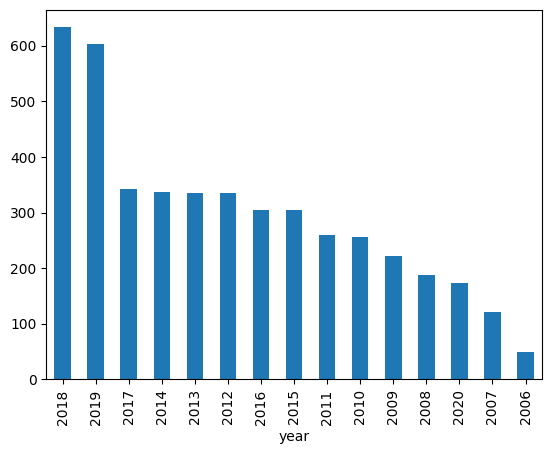

In [10]:
df['year'].value_counts().plot.bar()
plt.show()

In [11]:
# remove irrelevant information

df['details'] = df['title'] + ' ' + df['details']

df = df[['main_speaker', 'details']]
df.dropna(inplace=True)
df.head()

,main_speaker,details
0,Alexandra Auer,The intangible effects of walls More barriers ...
1,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...
2,Butterscotch,"""Accept Who I Am"" Firing off her formidable be..."
3,Ethan Lisi,"What it's really like to have autism ""Autism i..."
4,Daniel Finkel,Can you solve the sea monster riddle? Accordin...


In [12]:
# make a copy of the data

data = df.copy()

In [13]:
# text processing

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    
    imp_words = []
    for word in str(text).split():
        word = word.lower()
        if word not in stop_words:
            imp_words.append(word)
    output = " ".join(imp_words)
    return output



In [14]:
df['details'] = df['details'].apply(lambda text: remove_stopwords(text))

df.head()

,main_speaker,details
0,Alexandra Auer,intangible effects walls barriers exist end wo...
1,Elizabeth Gilbert,ok feel overwhelmed. here's next feeling anxio...
2,Butterscotch,"""accept am"" firing formidable beatboxing skill..."
3,Ethan Lisi,"really like autism ""autism disease; another wa..."
4,Daniel Finkel,"solve sea monster riddle? according legend, ev..."


In [15]:
# remove punctuations

punctuations_list = string.punctuation

def cleaning_punc(text):
    signal = str.maketrans('', '', punctuations_list)
    return text.translate(signal)

df['details'] = df['details'].apply(lambda x: cleaning_punc(x))
df.head()

,main_speaker,details
0,Alexandra Auer,intangible effects walls barriers exist end wo...
1,Elizabeth Gilbert,ok feel overwhelmed heres next feeling anxious...
2,Butterscotch,accept am firing formidable beatboxing skills ...
3,Ethan Lisi,really like autism autism disease another way ...
4,Daniel Finkel,solve sea monster riddle according legend ever...


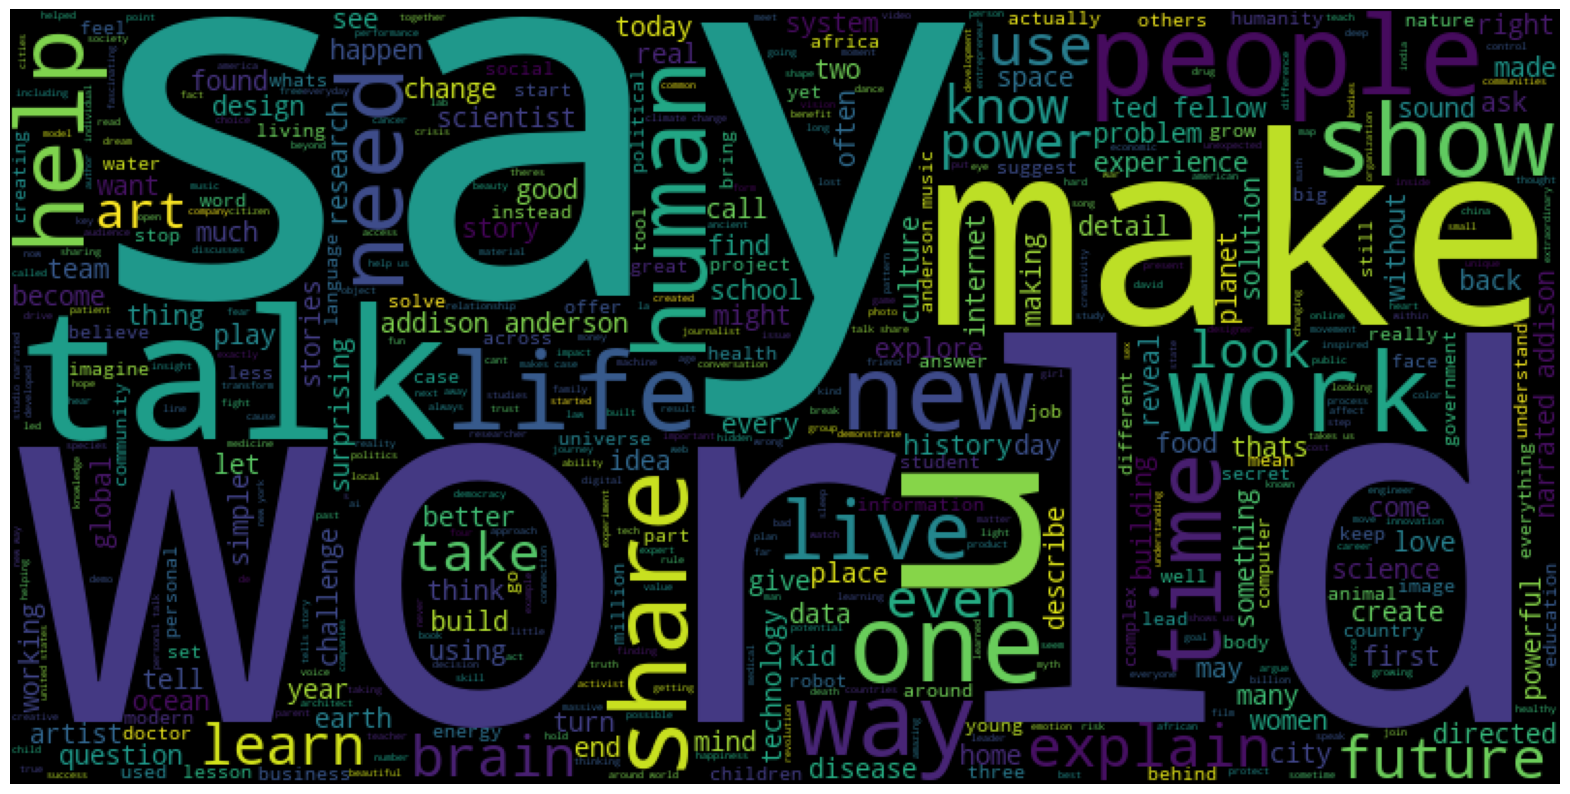

In [16]:
# use wordcloud to visualize word occurence

details_corpus = " ".join(df['details'])

plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000,
               width=800,
               height=400).generate(details_corpus)

plt.axis('off')
plt.imshow(wc)
plt.show()

In [17]:
# building the unsupervised machine learning recommendation system
vectorizer = TfidfVectorizer(analyzer = 'word')
vectorizer.fit(df['details'])

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [18]:
df.head()

,main_speaker,details
0,Alexandra Auer,intangible effects walls barriers exist end wo...
1,Elizabeth Gilbert,ok feel overwhelmed heres next feeling anxious...
2,Butterscotch,accept am firing formidable beatboxing skills ...
3,Ethan Lisi,really like autism autism disease another way ...
4,Daniel Finkel,solve sea monster riddle according legend ever...


In [19]:
# cosine similarity and pearson correalation

def get_similarities(talk_content, data=df):
    talk_array = vectorizer.transform(talk_content).toarray()
    sim = []
    pea = []
    for idx, row in data.iterrows():
        details = row['details']
        # get the vector for current talks
        talk_arrays = vectorizer.transform(
            data[data['details'] == details]['details']).toarray()
        # using as cosine sim
        cos_sim = cosine_similarity(talk_array, talk_arrays)[0][0]
        # pearson corr
        pea_sim = pearsonr(talk_array.squeeze(), talk_arrays.squeeze())[0]
        sim.append(cos_sim)
        pea.append(pea_sim)
    return sim,pea

In [20]:
def recommend_talks(talk_content, data=data):
    data['cos_sim'], data['pea_sim'] = get_similarities(talk_content)
    data.sort_values(by=['cos_sim', 'pea_sim'], ascending=[False, False], inplace=True)
    display(data[['main_speaker', 'details']].head())

In [21]:
talk_content = ['Time Management and working\
hard to become successful in life']

recommend_talks(talk_content)

,main_speaker,details
1758,Laura Vanderkam,How to gain control of your free time There ar...
2173,Philip Krinks,Finding your personal mission in life Philip K...
66,Fang Ruan,Management lessons from Chinese business and p...
1658,Chimamanda Ngozi Adichie,We should all be feminists We teach girls that...
3190,Nirmalya Kumar,India's invisible innovation Can India become ...
